In [1]:
#upload necessary libraries that will be used
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import random

In [14]:
# import the data into the program and divide them into input and output
# The data set here has the exam1 and exam2 scores upon which a student is judjed if he will be admitted to the institution or not
data = np.loadtxt('train.txt', delimiter=',')
#-1 is indexed since it contain y's which should be excluded
X = data[:, 0:-1] 
#here -1 indexing is done to include the y's
Y = data[:,-1]

In [15]:
# step size in the mesh
h = .02  

#the value 1e3 or 1000 species the degree of the regularization
#smaller value indicates stronger regularization
logreg = linear_model.LogisticRegression(C=1e3)

In [16]:
#actual fitting of the provided data into the classifier
logreg.fit(X, Y)

#Finding the maximum and minimum of x's and y's to limit the size of the plot
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#convert all the input-output from a matrix to a single array
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

(30.10326323428011, 99.36326323427863)

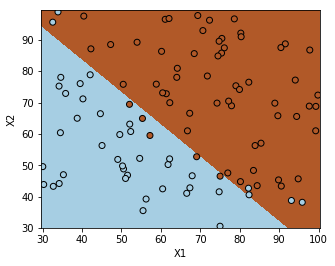

In [17]:
#Create a figure of specified size and in a colour plot 
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plotting the data points provided and setting the limits of the graph
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


In [18]:
#testing the data for some random value of the train data
random_data=random.randint(0,len(Y))
prediction=logreg.predict(X[random_data:random_data+1,:])
if prediction==Y[random_data]:
    print("Successful")
else:
    print("Not Successful")

Successful
